In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")
#sns.set_style("whitegrid")
#sns.set_style("dark")
#sns.set_style("white")
#sns.set_style("ticks")

In [5]:
# load dataframe

df = pd.read_csv("Iris.csv")

In [8]:
# dataframe information
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

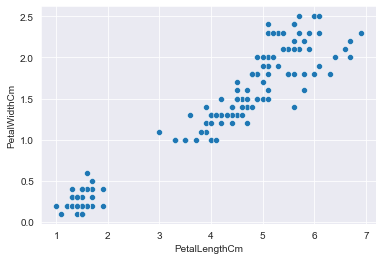

In [53]:
sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", data = df)

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

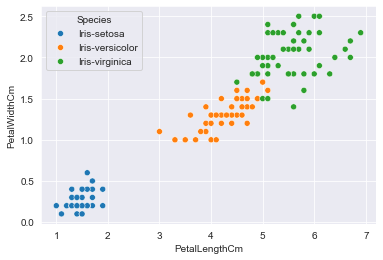

In [54]:
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=df)

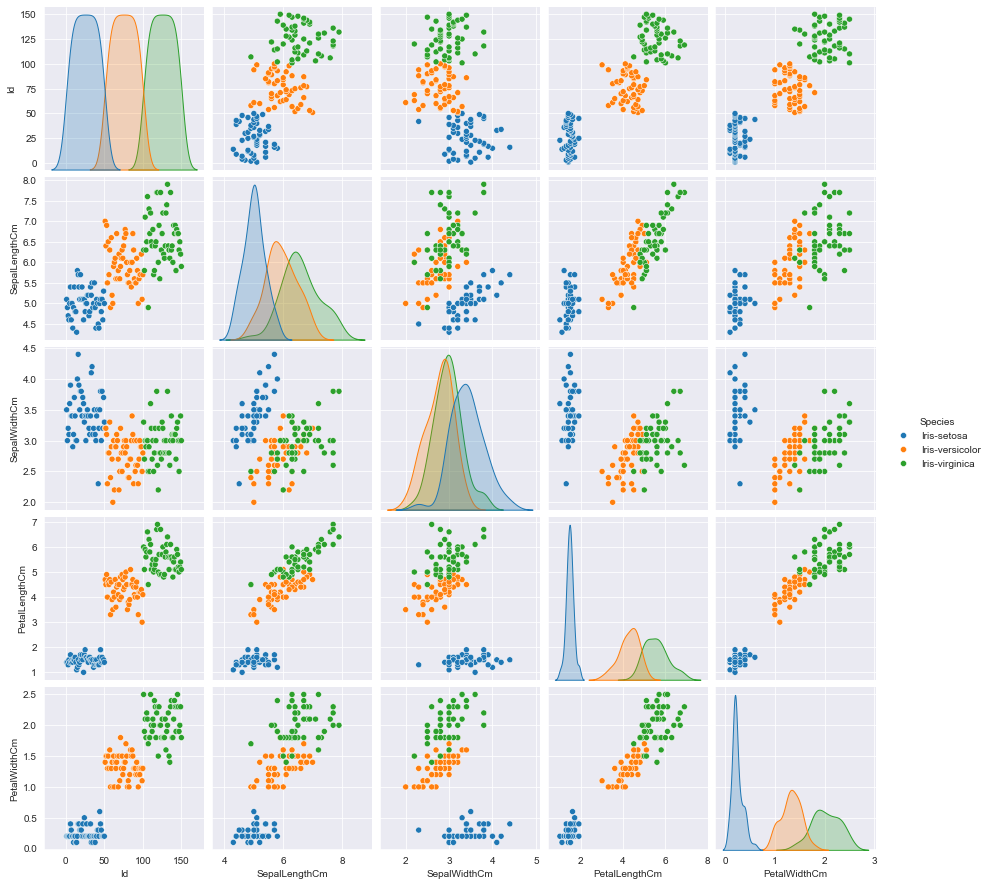

In [ ]:
# more scatterplots and densityplots (KDE) for different features
sns.pairplot(df, hue="Species", diag_kind="kde")

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

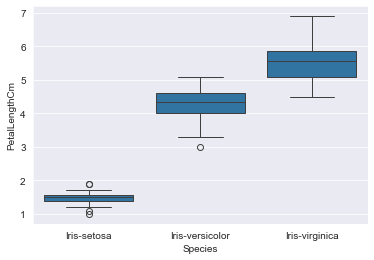

In [47]:
# boxplot to accentuate the PetalLengthCm differences
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

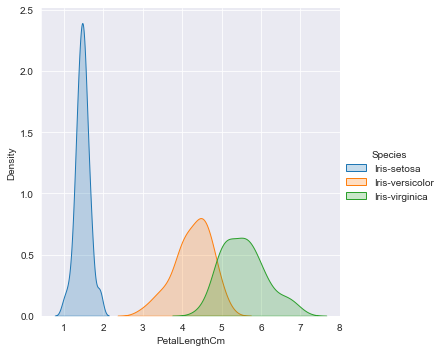

In [51]:
# density curve, aka kernel density plot or kernel density estimate (KDE)

g = sns.FacetGrid(df, hue="Species", height=5)
g.map(sns.kdeplot, "PetalLengthCm", fill=True)
g.add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

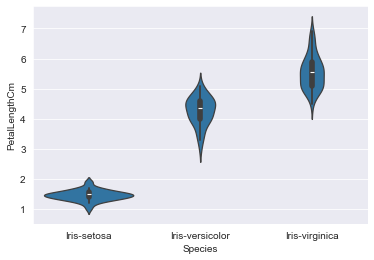

In [48]:
# violinplot; combines KDE with boxplots
sns.violinplot(x="Species", y="PetalLengthCm", data=df)

In [118]:
# density plot for small datasets
# sns.swarmplot(x="Species", y="PetalLengthCm", data=df)

<AxesSubplot:>

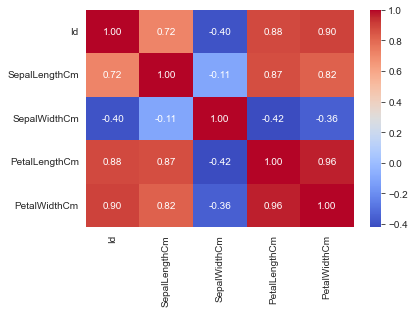

In [50]:
# heatmap for feature correlations
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

#### Feature Engineering

In [55]:
# drop the 'Id' column
df = df.drop(columns=['Id'])

In [58]:
# separate features and target
X = df.drop(columns=['Species'])  # features
y = df['Species']  # target

#### Modeling


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [105]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. LogisticRegression

Modeling

In [106]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [107]:
y_pred = clf.predict(X_test)

Evaluation

In [108]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [109]:
# Classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



<AxesSubplot:>

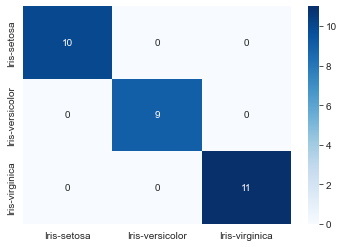

In [110]:
# Confusion Matrix
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)

2. K-Nearest Neighbors (KNN)

Modeling

In [111]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [112]:
y_pred = clf.predict(X_test)

Evaluation

In [113]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

3. RandomForestClassifier

Modeling

In [114]:
# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [115]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

Evaluation

In [116]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [117]:
# Classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

